In [1]:
require(foreign)
require(ggplot2)
require(MASS)
require(reshape2)

# data/tutorial from https://stats.idre.ucla.edu/r/dae/ordinal-logistic-regression/
# also: https://medium.com/evangelinelee/brant-test-for-proportional-odds-in-r-b0b373a93aa2
# also: https://sebastiansauer.github.io/convert_logit2prob/#:~:text=convert%20odds%20to%20probability%20using,2)%3D%202%20%2F%203%20(~.

data = read.dta("https://stats.idre.ucla.edu/stat/data/ologit.dta")

head(data, 15)

mod = polr(apply ~ pared + public + gpa, data = data, Hess=TRUE)

print(summary(mod))

mod_summary = summary(mod)
t_values = mod_summary$coefficients[, 't value']
p_values = (1 - pnorm(abs(t_values)))*2
t_and_p = cbind(t_values, p_values)
print(t_and_p)

Loading required package: foreign

Loading required package: ggplot2

Loading required package: MASS

Loading required package: reshape2



,apply,pared,public,gpa
,<fct>,<int>,<int>,<dbl>
1,very likely,0,0,3.26
2,somewhat likely,1,0,3.21
3,unlikely,1,1,3.94
4,somewhat likely,0,0,2.81
5,somewhat likely,0,0,2.53
6,unlikely,0,1,2.59
7,somewhat likely,0,0,2.56
8,somewhat likely,0,0,2.73
9,unlikely,0,0,3.00


Call:
polr(formula = apply ~ pared + public + gpa, data = data, Hess = TRUE)

Coefficients:
          Value Std. Error t value
pared   1.04769     0.2658  3.9418
public -0.05879     0.2979 -0.1974
gpa     0.61594     0.2606  2.3632

Intercepts:
                            Value   Std. Error t value
unlikely|somewhat likely     2.2039  0.7795     2.8272
somewhat likely|very likely  4.2994  0.8043     5.3453

Residual Deviance: 717.0249 
AIC: 727.0249 
                              t_values     p_values
pared                        3.9418050 8.087072e-05
public                      -0.1973593 8.435464e-01
gpa                          2.3632399 1.811594e-02
unlikely|somewhat likely     2.8271792 4.696004e-03
somewhat likely|very likely  5.3452947 9.027008e-08


In [2]:
# checking the proportional odds assumption

print('Checking the proportional odds assumption with the Brant test:')

library(brant)

po_test = brant(mod)

po_test_probs = po_test[, 'probability']

non_parallel = sum(subset(po_test_probs, sum(po_test_probs <= 0.05) != 0))

if(non_parallel != 0){print('Based on the Brant test, the proportional odds assumption is violated! Do not trust the model results.')
                     }else {print('Based on the Brant test, the proportional odds assumption holds!')}



[1] "Checking the proportional odds assumption with the Brant test:"
-------------------------------------------- 
Test for	X2	df	probability 
-------------------------------------------- 
Omnibus		4.34	3	0.23
pared		0.13	1	0.72
public		3.44	1	0.06
gpa		0.18	1	0.67
-------------------------------------------- 

H0: Parallel Regression Assumption holds
[1] "Based on the Brant test, the proportional odds assumption holds!"


[1] "The odds increase (more likely to apply) for a one unit increase in each predictor (holding the other predictors constant) are:"
    pared    public       gpa 
2.8510579 0.9429088 1.8513972 
[1] "The probability increase (more likely to apply) for a one unit increase in each predictor (holding the other predictors constant) are:"
    pared    public       gpa 
0.7403311 0.4853078 0.6492947 


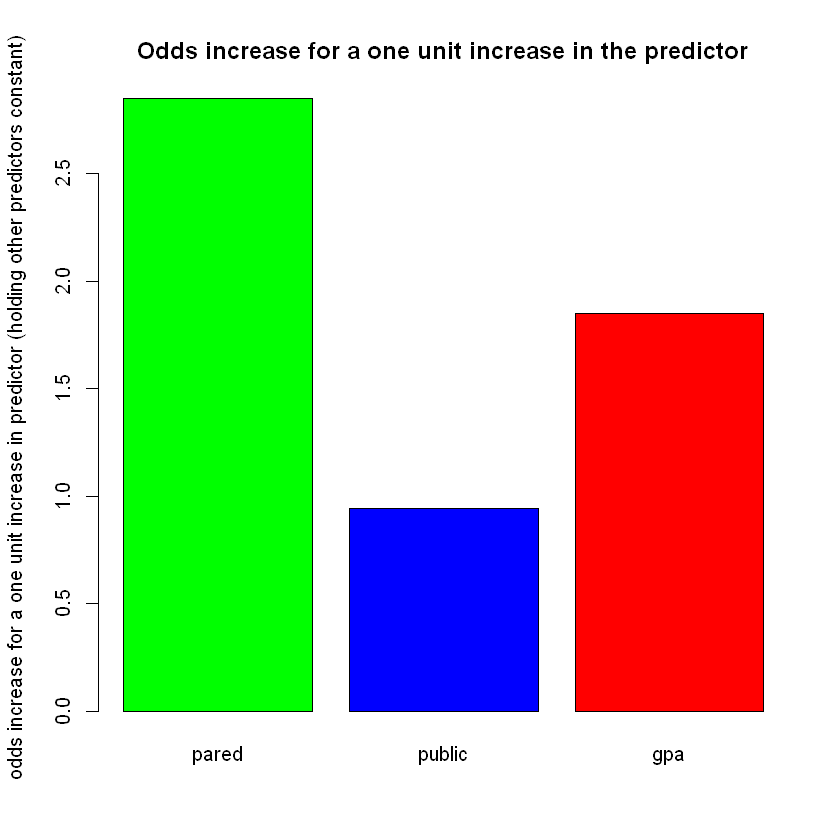

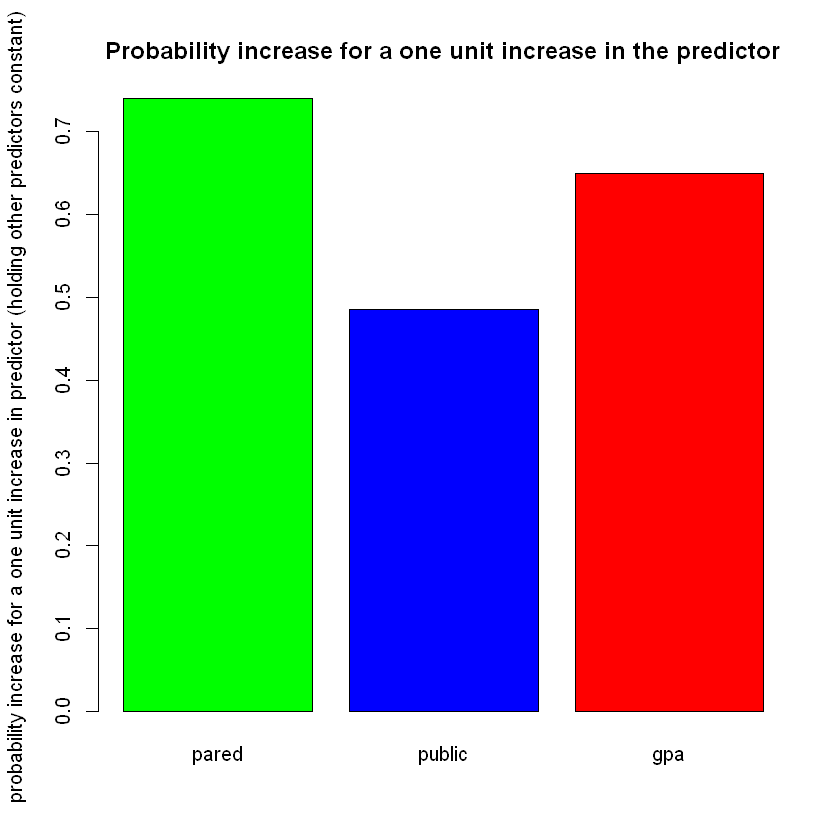

In [3]:
# calculating and plotting the odds (increase in odds for one unit change in a predictor)

odds = exp(coef(mod))

print('The odds increase (more likely to apply) for a one unit increase in each predictor (holding the other predictors constant) are:')
print(odds)

# plotting the predicted odds increases obtained from the model
barplot(odds, ylab = 'odds increase for a one unit increase in predictor (holding other predictors constant)', 
        main = 'Odds increase for a one unit increase in the predictor', col = c('green', 'blue', 'red'))

# converting the odds to probabilities
probs = odds/(1+odds)
print('The probability increase (more likely to apply) for a one unit increase in each predictor (holding the other predictors constant) are:')
print(probs)

# plotting the predicted increase in probabilities
barplot(probs, ylab = 'probability increase for a one unit increase in predictor (holding other predictors constant)', 
        main = 'Probability increase for a one unit increase in the predictor', col = c('green', 'blue', 'red'))

In [4]:
# calculate the total number of observations and create vectors of the full scale of each variable 

nobs = length(data[,1])

range_gpa = range(data$gpa)

range_pared = range(data$pared)

range_public = range(data$public)


# create a dataframe with the full scales of each variable
data_ranges = data.frame(gpa = seq(from = min(range_gpa), to = max(range_gpa), length.out = 100),
                        pared = rep(range_pared, nobs/2),
                        public = rep(range_public, nobs/2))

# use the above dataframe to generate predictions based on the ordinal logit model
data_ranges_predictions = data.frame(gpa = seq(from = min(range_gpa), to = max(range_gpa), length.out = 100),
                        pared = rep(range_pared, nobs/2),
                        public = rep(range_public, each = nobs/2),
                        predict = predict(mod, newdata = data_ranges, type = 'probs'))
head(data_ranges_predictions, 10)

,gpa,pared,public,predict.unlikely,predict.somewhat.likely,predict.very.likely
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1.900000,0,0,0.7376186,0.2204577,0.04192370
2,1.921212,1,0,0.5079138,0.3855962,0.10649001
3,1.942424,0,0,0.7325300,0.2244841,0.04298593
4,1.963636,1,0,0.5013818,0.3896162,0.10900205
5,1.984848,0,0,0.7273792,0.2285470,0.04407383
6,2.006061,1,0,0.4948492,0.3935848,0.11156594
7,2.027273,0,0,0.7221668,0.2326452,0.04518797
8,2.048485,1,0,0.4883185,0.3974991,0.11418240
9,2.069697,0,0,0.7168936,0.2367775,0.04632890


In [5]:
# change the shape of the dataframe so there is one row for each predicted probability (rather than one row for each
# observation)

clean_probs = melt(data_ranges_predictions, id.vars = c("pared", "public", "gpa"),
  variable.name = "predicted_class", value.name="probability")

head(clean_probs, 10)

,pared,public,gpa,predicted_class,probability
,<int>,<int>,<dbl>,<fct>,<dbl>
1,0,0,1.900000,predict.unlikely,0.7376186
2,1,0,1.921212,predict.unlikely,0.5079138
3,0,0,1.942424,predict.unlikely,0.7325300
4,1,0,1.963636,predict.unlikely,0.5013818
5,0,0,1.984848,predict.unlikely,0.7273792
6,1,0,2.006061,predict.unlikely,0.4948492
7,0,0,2.027273,predict.unlikely,0.7221668
8,1,0,2.048485,predict.unlikely,0.4883185
9,0,0,2.069697,predict.unlikely,0.7168936


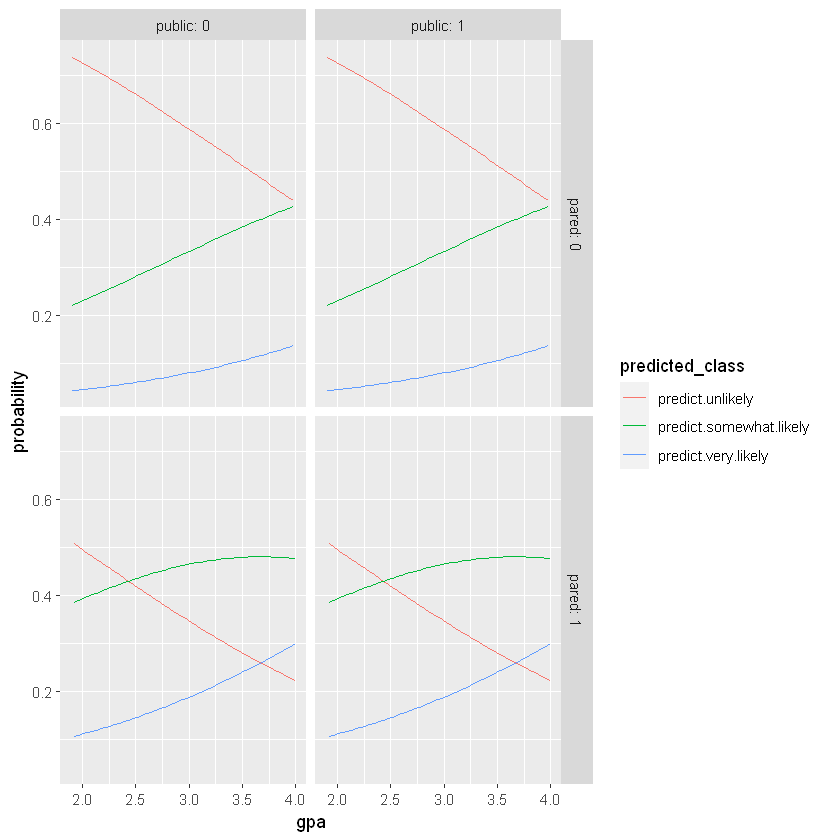

In [6]:
# generate a facet grid to show the predicted probability of falling into a particular outcome class as a function of 
# the predictor variables

ggplot(clean_probs, aes(x = gpa, y = probability, colour = predicted_class)) +
  geom_line() + facet_grid(pared ~ public, labeller="label_both")